In [85]:
import keras
from keras.datasets import mnist # MNIST database
from tensorflow.python.keras import Sequential # Model of our neural network
from tensorflow.python.keras.layers import Dense, Dropout # Neurons (network base) and Regularizer (avoids overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Optimizer (back propagation)

In [86]:
# Loading training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [87]:
print("Number of images for training:", len(x_train))
print("Number of images for testing:", len(x_test))
print("x_train type:", type(x_treino))

first_image = x_train[0]
first_image_representation = y_train[0]

print("What image 0 represents:", first_image_representation)
print("First image format:", first_image.shape, type(first_image.shape))

# print(first_image)

Number of images for training: 60000
Number of images for testing: 10000
x_train type: <class 'numpy.ndarray'>
What image 0 represents: 5
First image format: (28, 28) <class 'tuple'>


This image represents: 7


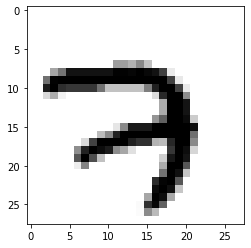

In [88]:
import matplotlib.pyplot as plt

index = 5000

print("This image represents:", y_treino[index])
plt.imshow(x_treino[index], cmap=plt.cm.binary)
plt.show()

In [89]:
# Transforming the image matrix into a vector

number_train = len(x_train) # 60000
number_test = len(x_test) # 10000

image_resolution = x_train[0].shape # (28, 28)
all_resolution = image_resolution[0] * image_resolution[1] # 28 * 28 = 784

x_train = x_train.reshape(number_train, all_resolution)
x_test = x_test.reshape(number_test, all_resolution)

In [90]:
print("Quantity of items in x_train [0]:", len(x_train[0]))

# How was x_train [0]?
print('\n\n',x_train[0])

Quantity of items in x_train [0]: 784


 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 2

In [91]:
# Data normalization

# 255 turns 1
# 127 turns 0.5
# 0   turns 0

# We need to ensure that the maximum input value is 1
# Since the image currently provides a maximum value of 255, we need to normalize them

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train[0][350], type(x_train[0][350]))

0.27450982 <class 'numpy.float32'>


In [92]:
# Viewing normalized data

print("Standardized data:", x_train[0])

Standardized data: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [93]:
# Preparation of the output layer (output)

# Transform unique values into categorical variables
# Number 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Number 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ...
# Number 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

unique_values = set(y_train) # {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
print(unique_values)

number_unique_values = len(unique_values) # 10
print(number_unique_values)

print("y_train[0] before:", y_train[0])

y_train = keras.utils.to_categorical(y_train, number_unique_values)
y_test = keras.utils.to_categorical(y_test, number_unique_values)

print("y_train[0] ofter:", y_train[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_train[0] before: 5
y_train[0] ofter: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [94]:
# Creating the neural network model

model = Sequential()

# First hidden layer
# 30 neurons
# Activation function: ReLU
# As we are in the first hidden layer, we need to inform the format of the input layer
model.add(Dense(30, activation='relu', input_shape=(all_resolution,)))

# We added a regularizer, helps to avoid overfitting
# In this case, it will be Dropout
model.add(Dropout(0.2))

# Second hidden layer
# 20 neurons
# Activation function: ReLU
model.add(Dense(20, activation='relu'))

# Another regularizer after the second hidden layer
model.add(Dropout(0.2))

# We finish with the output layer, informing the number of unique values, which in this case is 10
model.add(Dense(number_unique_values, activation='softmax'))

# Displays the summary of the created model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                23550     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [95]:
# Compiles the model

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [96]:
# Trains the model

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.7965 - accuracy: 0.7522 - val_loss: 0.2878 - val_accuracy: 0.9187
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.8692 - val_loss: 0.2320 - val_accuracy: 0.9321
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3780 - accuracy: 0.8891 - val_loss: 0.2068 - val_accuracy: 0.9384
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.9007 - val_loss: 0.1905 - val_accuracy: 0.9449
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.9068 - val_loss: 0.1794 - val_accuracy: 0.9458
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3023 - accuracy: 0.9121 - val_loss: 0.1727 - val_accuracy: 0.9499
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.9151 - val_loss: 0.1755 - val_accuracy: 0.9498
Epoch 

Categorical value in y_test[index]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Prevision: [[3.3543307e-05 1.3859337e-04 9.4162624e-06 1.2904870e-03 1.0409855e-02
  5.3913088e-04 1.8316828e-06 6.9415383e-03 2.5326253e-03 9.7810292e-01]]

Adjusted prediction: [9]


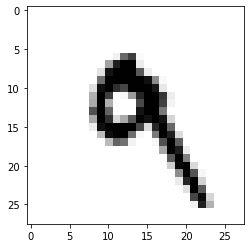

In [100]:
# Making our predictions

index = 7

print("Categorical value in y_test[index]:", y_test[index])

# Prepare the image for prediction
image = x_test[index].reshape((1, all_resolution))

prediction = model.predict(image)
print("\nPrevision:", prediction)

# Transform prediction into something we can understand

import numpy as np
prediction_class = np.argmax(prediction, axis=-1)
print("\nAdjusted prediction:", prediction_class)

# Just to view the image
(x_train_img, y_train_img), (x_test_img, y_test_img) = mnist.load_data()
plt.imshow(x_test_img[index], cmap=plt.cm.binary)